In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 

#imported the Necessary Library

In [2]:
#loading the data

df=pd.read_csv(r'C:\Users\HP\Downloads\archive (25)\WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


What Are We achieving with this Daata ?

Custumer_Attrition_Analysis
and Creating model

In [3]:
df.head()

#let have proper view About the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#statistical Summary Analysis

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#creating a function that can enable flow along with tha data input flow

def table(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f'{col}: {df[col].unique()}')

Explorative Data Analaysis

In [6]:
#checking How it data works,that is understanding the data, when we have a large columns 

df.loc[:,['Contract','MonthlyCharges']]

,Contract,MonthlyCharges
0,Month-to-month,29.85
1,One year,56.95
2,Month-to-month,53.85
3,One year,42.30
4,Month-to-month,70.70
...,...,...
7038,One year,84.80
7039,One year,103.20
7040,Month-to-month,29.60
7041,Month-to-month,74.40


In [7]:
#the shhape of the data

df.shape

(7043, 21)

In [8]:
#get the full lenght og the columns

pd.get_option('display.max_column')

20

In [9]:
#From the data statical Summary we take The minimum monthyy charges to see the custumers 

df.query('MonthlyCharges<=18.25')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3719,6823-SIDFQ,Male,0,No,No,28,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),18.25,534.7,No


This Custumer Pay pay as low as 18.25 for the service because we get to see that he didn't pertake in anyother services rather than just Phone call and only used Creditcard as a means of Payment.

In [10]:
#let the data type

type(df['TotalCharges'][0])

str

In [11]:
#set The totalcharge Into proper format

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

<AxesSubplot:ylabel='Density'>

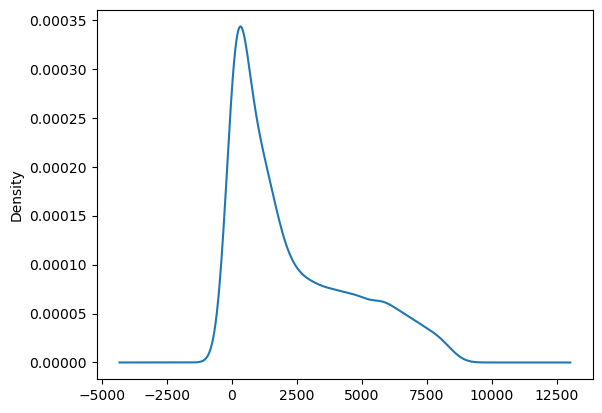

In [12]:
df['TotalCharges'].plot(kind='kde')

In [13]:
#To see the flow of the table properly.

table(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Oberservation:
    
    The values in some column as excessive values that re of the same thing, but appear like they are diffrenet,
    so let their lines properly. such as NO internert Services, we chaning it to 'NO'

In [14]:
#doing the Correction needfull for proper granularity in Analysis.

df['MultipleLines']=df['MultipleLines'].str.replace('No phone service','No',regex=False)

In [15]:
df['OnlineSecurity']=df['OnlineSecurity'].str.replace('No internet service','No',regex=False)
df['OnlineBackup']=df['OnlineBackup'].str.replace('No internet service','No',regex=False)
df['DeviceProtection']=df['DeviceProtection'].str.replace('No internet service','No',regex=False)
df['TechSupport']=df['TechSupport'].str.replace('No internet service','No',regex=False)
df['Streaming']=df['StreamingTV'].str.replace('No internet service','No',regex=False)

In [16]:
#we view to confirm

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


Text(0.5, 1.0, 'Churn Rate')

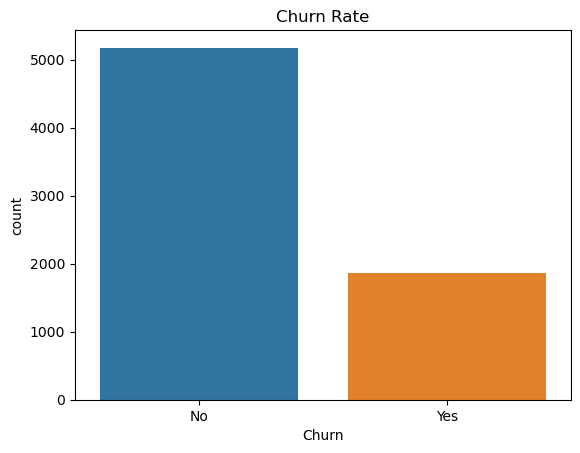

In [17]:
#Since our analysis is on Custuemr Attrition, we doing check the churn Rate

sns.countplot(data=df,x='Churn')
plt.title('Churn Rate')

Note :
    
    Churn No(stay) Mean 0
    Churn Yes(Leave) Mean 1

In [18]:
#creating a dataframe for yes and no custumers

yes_df=df.query('Churn=="Yes"')

In [19]:
no_df=df.query('Churn=="No"')

In [20]:
#checking the yes rate

yes_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,Yes


In [21]:
table(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
Streaming: ['No' 'Yes']


Why Would a Custumer leave a services|or company ?

In [22]:
#i study the column annd i try to pick out some features in the columns that can give us straight inside to the Analysis.

dframe=df.loc[:,['SeniorCitizen','tenure','Contract','MonthlyCharges','TotalCharges','Churn']]

In [23]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,No


In [24]:
#let do some features Engineering 

dframe['Real_Amount']=df['tenure']*df['MonthlyCharges']

In [25]:
dframe

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,Real_Amount
0,0,1,Month-to-month,29.85,29.85,No,29.85
1,0,34,One year,56.95,1889.50,No,1936.30
2,0,2,Month-to-month,53.85,108.15,Yes,107.70
3,0,45,One year,42.30,1840.75,No,1903.50
4,0,2,Month-to-month,70.70,151.65,Yes,141.40
...,...,...,...,...,...,...,...
7038,0,24,One year,84.80,1990.50,No,2035.20
7039,0,72,One year,103.20,7362.90,No,7430.40
7040,0,11,Month-to-month,29.60,346.45,No,325.60
7041,1,4,Month-to-month,74.40,306.60,Yes,297.60


In [26]:
#now let check on Method Means of payment

dframe=df.loc[:,['SeniorCitizen','tenure','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn',]]

In [27]:
dframe

,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,34,One year,No,Mailed check,56.95,1889.50,No
2,0,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,0,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [28]:
#let call back for Our Real Amount


dframe['Real_Amount']=df['tenure']*df['MonthlyCharges']

dframe

,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Real_Amount
0,0,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,0,34,One year,No,Mailed check,56.95,1889.50,No,1936.30
2,0,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,0,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40
...,...,...,...,...,...,...,...,...,...
7038,0,24,One year,Yes,Mailed check,84.80,1990.50,No,2035.20
7039,0,72,One year,Yes,Credit card (automatic),103.20,7362.90,No,7430.40
7040,0,11,Month-to-month,Yes,Electronic check,29.60,346.45,No,325.60
7041,1,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,297.60


In [29]:
#let see if i can get sketch to give us full detail about this columns

import sketch

In [30]:
dframe.sketch.ask('can you give me a friendly names and single sentence descriptions of each column ?(format output as HTML List)')

Yayyyyy: sketch came through 😍😍😍😍
    
We Create a New columns called Real Amount.Exactly Just Like Sketch explain it, is the The real amount charged to the customer over their tenure.


In [31]:
#checking for PaperlessBilling where custumer churn,

dframe.query('PaperlessBilling=="Yes"')

,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Real_Amount
0,0,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
2,0,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
4,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40
5,0,8,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,797.20
6,0,22,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,1960.20
...,...,...,...,...,...,...,...,...,...
7038,0,24,One year,Yes,Mailed check,84.80,1990.50,No,2035.20
7039,0,72,One year,Yes,Credit card (automatic),103.20,7362.90,No,7430.40
7040,0,11,Month-to-month,Yes,Electronic check,29.60,346.45,No,325.60
7041,1,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,297.60


In [32]:
#where custumer did not churn

dframe.query('PaperlessBilling=="No"')

,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Real_Amount
1,0,34,One year,No,Mailed check,56.95,1889.50,No,1936.30
3,0,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
7,0,10,Month-to-month,No,Mailed check,29.75,301.90,No,297.50
9,0,62,One year,No,Bank transfer (automatic),56.15,3487.95,No,3481.30
11,0,16,Two year,No,Credit card (automatic),18.95,326.80,No,303.20
...,...,...,...,...,...,...,...,...,...
7019,0,39,Two year,No,Mailed check,20.15,826.00,No,785.85
7027,0,13,Month-to-month,No,Mailed check,73.35,931.55,No,953.55
7028,0,68,Two year,No,Bank transfer (automatic),64.10,4326.25,No,4358.80
7031,1,55,One year,No,Credit card (automatic),60.00,3316.10,No,3300.00


In [33]:
#The Price Differneces

dframe['Price_Diff']=dframe['Real_Amount']-dframe['TotalCharges']

In [34]:
dframe.head()

,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Real_Amount,Price_Diff
0,0,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,0.00
1,0,34,One year,No,Mailed check,56.95,1889.50,No,1936.30,46.80
2,0,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70,-0.45
3,0,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50,62.75
4,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40,-10.25


In [35]:
#top 20

dframe[:20]

,SeniorCitizen,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Real_Amount,Price_Diff
0,0,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,0.00
1,0,34,One year,No,Mailed check,56.95,1889.50,No,1936.30,46.80
2,0,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70,-0.45
3,0,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50,62.75
4,0,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40,-10.25
5,0,8,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,797.20,-23.30
6,0,22,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,1960.20,10.80
7,0,10,Month-to-month,No,Mailed check,29.75,301.90,No,297.50,-4.40
8,0,28,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,2934.40,-111.65
9,0,62,One year,No,Bank transfer (automatic),56.15,3487.95,No,3481.30,-6.65


Observation:
    in the price Diff columns, 
    
    if a value have (-) negative sign, that is The custumer is paying excessive Money and this custumer is likely to churn.
    
    Custumer who don't used Paperless billing tend to stay while custumer who used Paperlessbilling are more likely to leave.
    
    Custumers who are under yearly contract seems to getting discount.
    
    The custumer whose price differences has (-)
   

In [36]:
no_df=dframe.query('PaperlessBilling=="No"')

In [37]:
yes_df=dframe.query('PaperlessBilling=="Yes"')

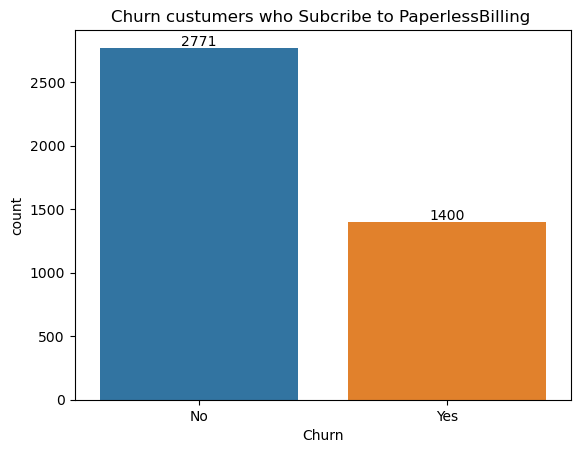

In [38]:
#we plotting to see the rate Churn for custumers who subcribe for paperlessbill

plt.figure(dpi=100)
fig=sns.countplot(data=yes_df,x='Churn')
plt.title("Churn custumers who Subcribe to PaperlessBilling ")

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

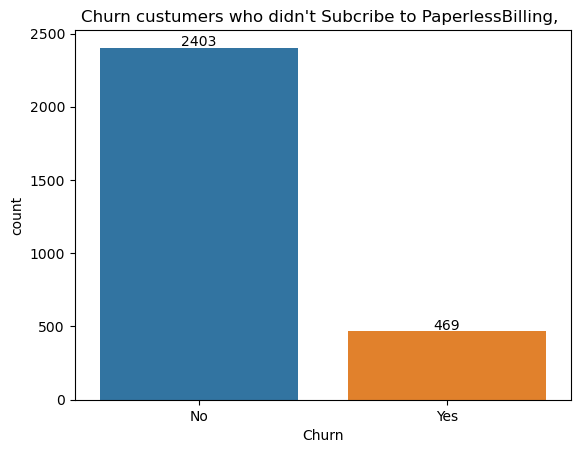

In [39]:
#we plotting to see the rate Churn for custumers who subcribe for paperlessbill

plt.figure(dpi=100)
fig=sns.countplot(data=no_df,x='Churn')
plt.title("Churn custumers who didn't Subcribe to PaperlessBilling, ")

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

For custumer who Subcribe to Paperless Billing about 1400 custumer churn,

while less Custumer who didn't subcribe for paperlessbill are not up to 500 custumer who churn.

Observation:
paperlessbill should be taking down from the paymentmethodology.

In [40]:
##we plotting to see the rate Churn for custumers who used Electronic Check

dframe.query('PaymentMethod=="Electronic check"')['Churn'].value_counts()

No     1294
Yes    1071
Name: Churn, dtype: int64

In [41]:
##we plotting to see the rate Churn for custumers who used mail Check

dframe.query('PaymentMethod=="Mailed check"')['Churn'].value_counts()

No     1304
Yes     308
Name: Churn, dtype: int64

In [42]:
##we plotting to see the rate Churn for custumers who used Bank Ta=ransfer check(Automatic)


dframe.query('PaymentMethod=="Bank transfer (automatic)"')['Churn'].value_counts()

No     1286
Yes     258
Name: Churn, dtype: int64

In [43]:
##we plotting to see the rate Churn for custumers who used CreditCard

dframe.query('PaymentMethod=="Credit card (automatic)"')['Churn'].value_counts()

No     1290
Yes     232
Name: Churn, dtype: int64

Obseervation:
    
    
    Another means of Payment to taken down is Electronic Check.
    Custumer Seems to don't welcome Electronic check payment method.
    about 1000 Plus custumer using Elecctronic Check churn.

ML

In [44]:
#we gat LabelEncoder, to help us transform the data to numeric

from sklearn.preprocessing import LabelEncoder

In [45]:
#creating a instance

Encode=LabelEncoder()

In [46]:
table(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
Streaming: ['No' 'Yes']


In [47]:
#using Labelencoder to transform the Data to numeric


df['gender']=Encode.fit_transform(df['gender'])
df['Partner']=Encode.fit_transform(df['Partner'])
df['Dependents']=Encode.fit_transform(df['Dependents'])
df['PhoneService']=Encode.fit_transform(df['MultipleLines'])
df['InternetService']=Encode.fit_transform(df['InternetService'])
df['OnlineSecurity']=Encode.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=Encode.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=Encode.fit_transform(df['DeviceProtection'])
df['TechSupport']=Encode.fit_transform(df['TechSupport'])
df['StreamingMovies']=Encode.fit_transform(df['StreamingMovies'])
df['StreamingTV']=Encode.fit_transform(df['StreamingTV'])
df['Contract']=Encode.fit_transform(df['Contract'])
df['PaperlessBilling']=Encode.fit_transform(df['PaperlessBilling'])
df['Churn']=Encode.fit_transform(df['Churn'])
df['Streaming']=Encode.fit_transform(df['Streaming'])

In [48]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming
0,7590-VHVEG,0,0,1,0,1,0,No,0,0,...,0,0,0,0,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,1,0,0,0,34,0,No,0,1,...,0,0,0,1,0,Mailed check,56.95,1889.50,0,0
2,3668-QPYBK,1,0,0,0,2,0,No,0,1,...,0,0,0,0,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,1,0,0,0,45,0,No,0,1,...,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,0,0,0,0,2,0,No,1,0,...,0,0,0,0,1,Electronic check,70.70,151.65,1,0


In [49]:
#i drop custumerid,

df=df.drop('customerID',axis=1)
df['MultipleLines']=Encode.fit_transform(df['MultipleLines'])
df['PaymentMethod']=Encode.fit_transform(df['PaymentMethod'])

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming
0,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,0,0,0,1,0,...,0,0,0,1,0,3,56.95,1889.50,0,0
2,1,0,0,0,2,0,0,0,1,1,...,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,45,0,0,0,1,0,...,1,0,0,1,0,0,42.30,1840.75,0,0
4,0,0,0,0,2,0,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,0


In [51]:
#check the data info again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [52]:
#missing Daata

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Streaming            0
dtype: int64

In [53]:
#that oarticular value we have missnig data

df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Streaming
488,0,0,1,1,0,0,0,0,1,0,...,1,2,0,2,1,0,52.55,NaN,0,1
753,1,0,0,1,0,0,0,2,0,0,...,0,1,1,2,0,3,20.25,NaN,0,0
936,0,0,1,1,0,0,0,0,1,1,...,0,2,2,2,0,3,80.85,NaN,0,1
1082,1,0,1,1,0,1,1,2,0,0,...,0,1,1,2,0,3,25.75,NaN,0,0
1340,0,0,1,1,0,0,0,0,1,1,...,1,2,0,2,0,1,56.05,NaN,0,1
3331,1,0,1,1,0,0,0,2,0,0,...,0,1,1,2,0,3,19.85,NaN,0,0
3826,1,0,1,1,0,1,1,2,0,0,...,0,1,1,2,0,3,25.35,NaN,0,0
4380,0,0,1,1,0,0,0,2,0,0,...,0,1,1,2,0,3,20.00,NaN,0,0
5218,1,0,1,1,0,0,0,2,0,0,...,0,1,1,1,1,3,19.70,NaN,0,0
6670,0,0,1,1,0,1,1,0,0,1,...,1,2,0,2,0,3,73.35,NaN,0,1


In [54]:
#dropping the nan values

df=df.dropna()

In [55]:
X=df.drop('Churn',axis=1) #Assign our X value

y=df['Churn']   #and getting out y

In [56]:
from sklearn.decomposition import PCA


#using pca for features selection

In [57]:
#creating a Instance

pca=PCA()

In [58]:
#fitting it

pca.fit(df)

PCA()

In [59]:


pca.explained_variance_ratio_

array([9.99860134e-01, 1.22131972e-04, 1.66869787e-05, 2.05127471e-07,
       1.84510462e-07, 1.12617816e-07, 9.43075025e-08, 7.22364259e-08,
       5.72104788e-08, 5.40839052e-08, 4.86299704e-08, 3.91050115e-08,
       3.05592967e-08, 2.94134308e-08, 2.75092245e-08, 2.60644448e-08,
       2.46104843e-08, 2.16633494e-08, 1.88838475e-08, 1.18710180e-10,
       5.20565114e-39])

In [60]:
f_s=pd.DataFrame(index=df.columns,data=pca.explained_variance_ratio_,columns=['Feature_Important'])

f_s.sort_values(by=['Feature_Important'],ascending=False)

,Feature_Important
gender,9.998601e-01
SeniorCitizen,1.221320e-04
Partner,1.668698e-05
Dependents,2.051275e-07
tenure,1.845105e-07
PhoneService,1.126178e-07
MultipleLines,9.430750e-08
InternetService,7.223643e-08
OnlineSecurity,5.721048e-08
OnlineBackup,5.408391e-08


using The columns features that more than 2.  while i drop The columns that are less than 2

<AxesSubplot:>

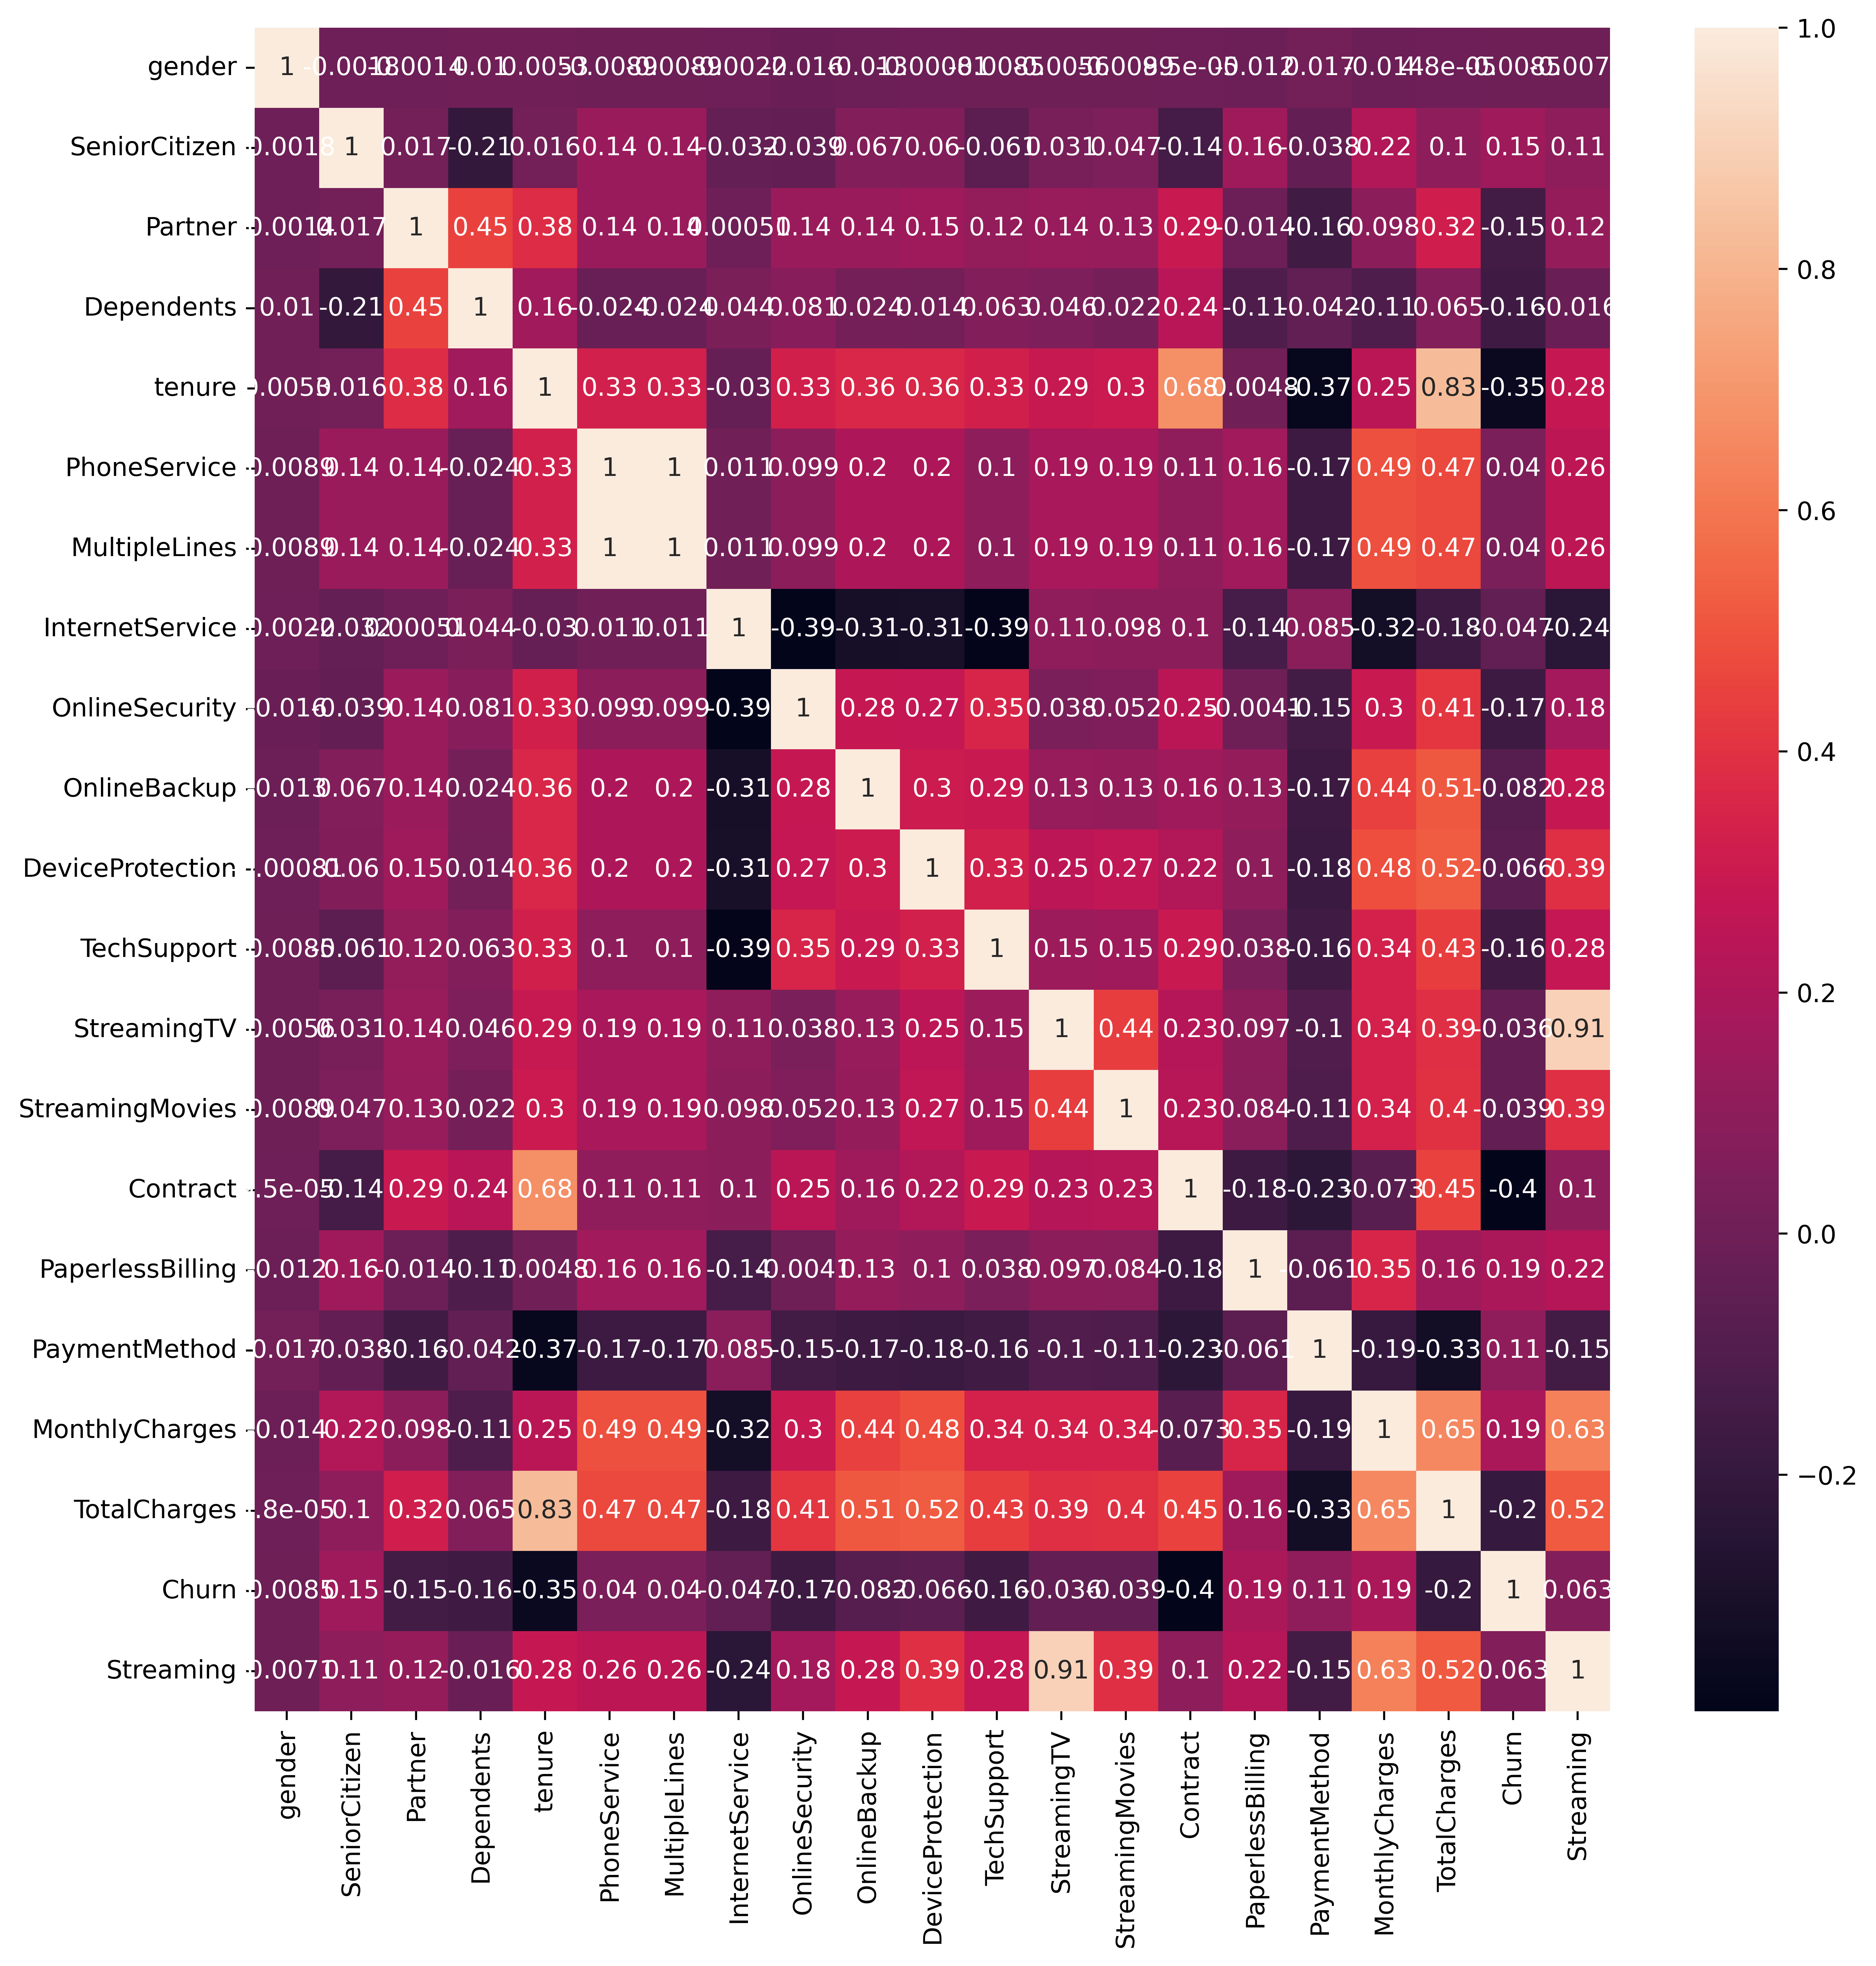

In [61]:
#correlation

plt.figure(figsize=(12,12),dpi=500)
sns.heatmap(df.corr(),annot=True)

In [62]:
dfr=df.loc[:,['gender','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','Contract','TechSupport','StreamingTV','TotalCharges','Streaming','Churn']]

In [63]:
y=dfr['Churn'] #X features

X=dfr.drop('Churn',axis=1) #Y features

In [64]:
from sklearn.linear_model import LogisticRegression

Text(0.5, 1.0, 'Churn Rate')

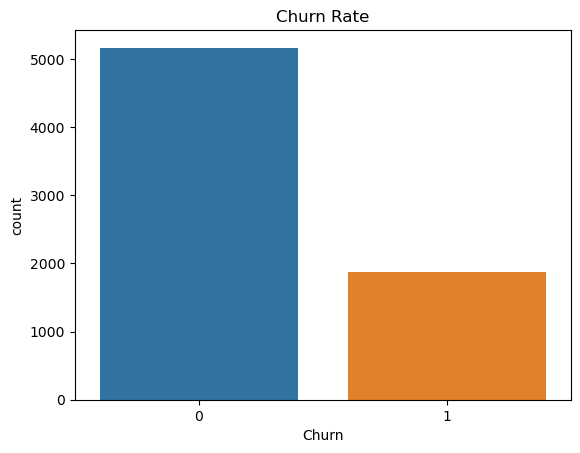

In [65]:
plt.figure()
sns.countplot(data=df,x='Churn')
plt.title('Churn Rate')

In [66]:
#importing the library for training and testing

from sklearn.model_selection import train_test_split

In [67]:
#splitting for training and small part for testng

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [68]:
#creating and instance and fiitting the X_features

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [69]:
#the y_predict

y_predict=model.predict(X_test)

In [70]:
#importing the evaluuation Library


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [71]:
#printing out the Evauation scores


Training_Score=model.score(X_train,y_train)
Testing_Score=model.score(X_test,y_test)


AccuracyScore=accuracy_score(y_test,y_predict)

print(f'The Accuracy Score is : {AccuracyScore}')
print(f'The Training Score is : {Training_Score}')
print(f'The Testing Score is : {Testing_Score}')

The Accuracy Score is : 0.7931925894011203
The Training Score is : 0.7911271492252175
The Testing Score is : 0.7931925894011203


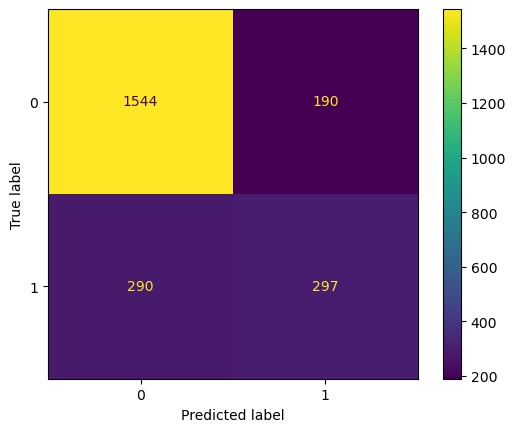

In [72]:
#the Metrics scores board for actual score and predicted score.

cm=confusion_matrix(y_test,y_predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()

from The confusion Metrics Scorees result one can see that model will perform poorly due to the Imbalance of data result score among The true Positive and True Negative.

In [73]:
#classification Report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1734
           1       0.61      0.51      0.55       587

    accuracy                           0.79      2321
   macro avg       0.73      0.70      0.71      2321
weighted avg       0.78      0.79      0.79      2321



we Have Imbalnace data set. why imbalance data.

In [74]:
from imblearn.over_sampling import RandomOverSampler

In [75]:
#Creating instance for the imported and creating fittin in 


rus=RandomOverSampler()
X,y=rus.fit_resample(X,y)

In [76]:
#confirming the y

y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [77]:
#retain

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
#the new model we importing

from sklearn.tree import DecisionTreeClassifier

In [79]:
#model create Instance

model1=DecisionTreeClassifier()

In [80]:
#fitting in the model

model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
test_peredict=model1.predict(X_test)

In [82]:
Accuracy=accuracy_score(y_test,test_peredict)

In [83]:
Accuracy

0.8345070422535211

We improve The Accuracy

In [84]:
print(classification_report(y_test,test_peredict))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1713
           1       0.79      0.90      0.84      1695

    accuracy                           0.83      3408
   macro avg       0.84      0.83      0.83      3408
weighted avg       0.84      0.83      0.83      3408



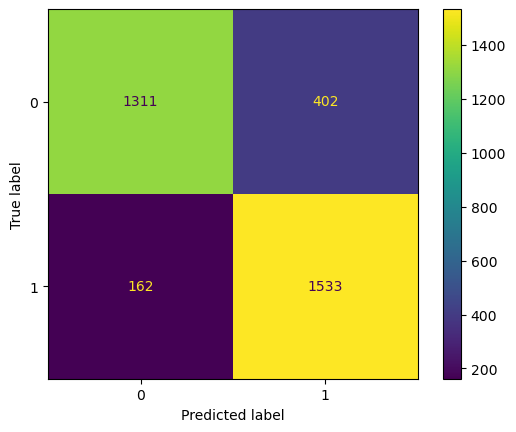

In [85]:
cm=confusion_matrix(y_test,test_peredict,labels=model1.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model1.classes_)
display.plot()

This Confusion result Metrics ressult is Good, atleast We have a good Range number between the True positive and True Negative.

In [88]:
#Import varities of classification model.


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [102]:
#let append the models by instanciating the model name

models=[]

models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('BAC',BaggingClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNC',KNeighborsClassifier()))
models.append(('SVM',SVC()))

In [103]:
#importing the crss_validation_library and Kfold llibrary

from sklearn.model_selection import cross_val_score,KFold

In [104]:
#instanciating Kfold and assigning the Number of split


fold=KFold(n_splits=5)

In [109]:
#evaluating each model


result=[]
names=[]
for name, modell in models:
    cv_result=cross_val_score(modell,X_train,y_train,cv=fold,scoring='accuracy')
    result.append(cv_result)
    names.append(name)
    msg='%s:%f (%f)'%(name,cv_result.mean(),cv_result.std())
    print(msg)

DTC:0.827841 (0.005998)
RFC:0.845332 (0.003546)
BAC:0.838393 (0.003785)
ETC:0.842730 (0.003869)
ABC:0.761347 (0.008391)
LDA:0.753829 (0.008550)
KNC:0.673893 (0.008063)
SVM:0.611303 (0.011790)


from the Look of ThinG we can see That the only four(4) model hit the 0.80 upward.model names: DTC, RFC, BAC & ETC.
however The best model to happen to be Random Tree Classifier.

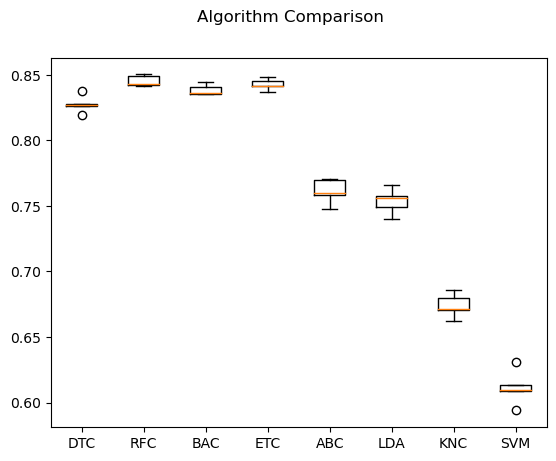

In [115]:
#plotting out the Model {performance on boxplot}

fig=plt.figure(100)
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names);

In [116]:
#With the Help of cross_validation we are able to ick the best model for us.
#so we using RandomForoestClassifier

models=RandomForestClassifier(max_depth=1000)

In [117]:
#we fitting the model

models.fit(X_train,y_train)

RandomForestClassifier(max_depth=1000)

In [118]:
#creating the test_prediction

test_prediction=models.predict(X_test)

In [119]:
#checking for the accraucy of of the traing score

models.score(X_train,y_train)

0.9962416883492339

In [120]:
#checking for the accuracy of the tetsing score

models.score(X_test,y_test)

0.8556338028169014

In [121]:
##Accuracy Score

accuracy_score(test_peredict,y_test)

0.8345070422535211

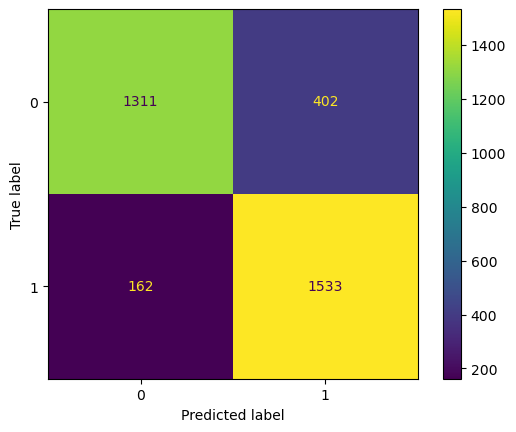

In [122]:
#plotting out the Confusion matrix of the Model

cm=confusion_matrix(y_test,test_peredict,labels=models.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=models.classes_)
display.plot()

Just like The previous Score rate The TP and FN are within good Range while the type error 1 and the type 2 has Low number as it should 
be.

In [124]:
#Error Rate 

model_accuracy=accuracy_score(test_peredict,y_test)

1-model_accuracy

0.16549295774647887

the Error Rate Is 0.165

In [125]:
#saving the model 
#let import the Library

import pickle as pk

In [132]:
with open('models.pk', 'wb') as file:
    pk.dump(models, file)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


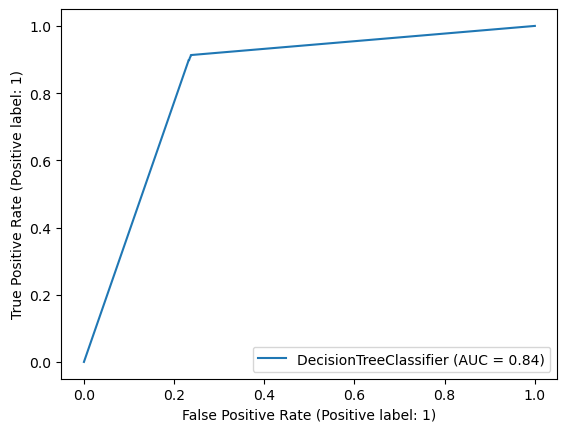

In [133]:
from sklearn.metrics import plot_roc_curve

# Plotting the ROC curve
plot_roc_curve(model1,X_test,y_test)

the ROC AUC is a classification evaluation metrics that help o evaluate The performnace of the calssification models.

it measurre the raea under Roc hich is plot of The True Positive rate against the False positive Rate.